# Educated data analysis

### 1. Importing the data

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

,Unnamed: 0,Unnamed: 1
0,NaN,NaN
1,NaN,"Twentieth Century Crop Statistics, 1900-2017"
2,NaN,https://sedac.ciesin.columbia.edu/data/set/foo...
3,NaN,NaN
4,NaN,August 2022
5,NaN,NaN
6,NaN,"W. Anderson1,2, W. Baethgen1, P. Capitanio3, P..."
7,NaN,NaN
8,NaN,1 International Research Institute for Clima...
9,NaN,NaN


These are all the sheets in the excel file.

Now we can combine the sheets that each crop has so all of the yields are in the same dataframe.

In [46]:
# Define the sheet names or indices to import
sheet_stats = ['CropStats']

# Import the sheets into a single DataFrame
df = pd.concat(pd.read_excel('../../archive/food-twentieth-century-crop-statistics-1900-2017-xlsx.xlsx', sheet_name=sheet_stats))
df

Unnamed: 0  Harvest_year   admin0    admin1   crop  \
CropStats 0               0          1902  Austria       NaN  wheat   
          1               1          1903  Austria       NaN  wheat   
          2               2          1904  Austria       NaN  wheat   
          3               3          1905  Austria       NaN  wheat   
          4               4          1906  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  \
CropStats 0                NaN                  NaN  1902          1.310000   
          1                NaN                  NaN  1903          1.470000   
          2                NaN                  NaN  1904          1.270000   
          3                NaN                  NaN  1905          1.330000   
          4                NaN                  NaN  1906          1.280000   
...                        ...                  ...   ...               ...   
          36702        75520.0             278300.0  2013          3.685117   
          36703        82120.0             309500.0  2014          3.768875   
          36704        89800.0             351300.0  2015          3.912027   
          36705        76590.0             253900.0  2016          3.315054   
          36706       103670.0             419200.0  2017          4.043600   

                 admin2 notes  
CropStats 0         NaN   NaN  
          1         NaN   NaN  
          2         NaN   NaN  
          3         NaN   NaN  
          4         NaN   NaN  
...                 ...   ...  
          36702     NaN   NaN  
          36703     NaN   NaN  
          36704     NaN   NaN  
          36705     NaN   NaN  
          36706     NaN   NaN  

[36707 rows x 11 columns]

In [48]:
df = df[~((df['production (tonnes)'].isnull()) & (df['yield(tonnes/ha)'].isnull() | df['hectares (ha)'].isnull()))]

In [49]:
df

Unnamed: 0  Harvest_year   admin0    admin1   crop  \
CropStats 59             59          1961  Austria       NaN  wheat   
          60             60          1962  Austria       NaN  wheat   
          61             61          1963  Austria       NaN  wheat   
          62             62          1964  Austria       NaN  wheat   
          63             63          1965  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  \
CropStats 59          275822.0                  NaN  1961          2.580000   
          60          270351.0                  NaN  1962          2.612000   
          61          274722.0                  NaN  1963          2.510000   
          62          282967.0                  NaN  1964          2.652000   
          63          275654.0                  NaN  1965          2.397000   
...                        ...                  ...   ...               ...   
          36702        75520.0             278300.0  2013          3.685117   
          36703        82120.0             309500.0  2014          3.768875   
          36704        89800.0             351300.0  2015          3.912027   
          36705        76590.0             253900.0  2016          3.315054   
          36706       103670.0             419200.0  2017          4.043600   

                 admin2 notes  
CropStats 59        NaN   NaN  
          60        NaN   NaN  
          61        NaN   NaN  
          62        NaN   NaN  
          63        NaN   NaN  
...                 ...   ...  
          36702     NaN   NaN  
          36703     NaN   NaN  
          36704     NaN   NaN  
          36705     NaN   NaN  
          36706     NaN   NaN  

[35192 rows x 11 columns]

In [50]:
# Find the indexes of rows where 'production' is null
null_indexes = df[df['production (tonnes)'].isnull()].index

# Loop through the null indexes and calculate the missing 'production' values
for index in null_indexes:
    df.at[index, 'production (tonnes)'] = df.at[index, 'yield(tonnes/ha)'] * df.at[index, 'hectares (ha)']

In [51]:
df

Unnamed: 0  Harvest_year   admin0    admin1   crop  \
CropStats 59             59          1961  Austria       NaN  wheat   
          60             60          1962  Austria       NaN  wheat   
          61             61          1963  Austria       NaN  wheat   
          62             62          1964  Austria       NaN  wheat   
          63             63          1965  Austria       NaN  wheat   
...                     ...           ...      ...       ...    ...   
          36702       36702          2013    China  zhejiang  wheat   
          36703       36703          2014    China  zhejiang  wheat   
          36704       36704          2015    China  zhejiang  wheat   
          36705       36705          2016    China  zhejiang  wheat   
          36706       36706          2017    China  zhejiang  wheat   

                 hectares (ha)  production (tonnes)  year  yield(tonnes/ha)  \
CropStats 59          275822.0           711620.760  1961          2.580000   
          60          270351.0           706156.812  1962          2.612000   
          61          274722.0           689552.220  1963          2.510000   
          62          282967.0           750428.484  1964          2.652000   
          63          275654.0           660742.638  1965          2.397000   
...                        ...                  ...   ...               ...   
          36702        75520.0           278300.000  2013          3.685117   
          36703        82120.0           309500.000  2014          3.768875   
          36704        89800.0           351300.000  2015          3.912027   
          36705        76590.0           253900.000  2016          3.315054   
          36706       103670.0           419200.000  2017          4.043600   

                 admin2 notes  
CropStats 59        NaN   NaN  
          60        NaN   NaN  
          61        NaN   NaN  
          62        NaN   NaN  
          63        NaN   NaN  
...                 ...   ...  
          36702     NaN   NaN  
          36703     NaN   NaN  
          36704     NaN   NaN  
          36705     NaN   NaN  
          36706     NaN   NaN  

[35192 rows x 11 columns]

In [52]:
df.isnull().sum()

Unnamed: 0                 0
Harvest_year               0
admin0                     0
admin1                  2631
crop                       0
hectares (ha)            117
production (tonnes)        0
year                       0
yield(tonnes/ha)        1126
admin2                 35192
notes                  29551
dtype: int64

In [53]:
grouped_data = df.groupby(['admin0', 'year'])['production (tonnes)'].sum().reset_index()
grouped_data

,admin0,year,production (tonnes)
0,Argentina,1900,4545130.000
1,Argentina,1901,3668403.328
2,Argentina,1902,6607305.400
3,Argentina,1903,7978701.728
4,Argentina,1904,7677243.520
...,...,...,...
2494,Uruguay,2015,1670500.000
2495,Uruguay,2016,1244000.000
2496,Uruguay,2017,911000.000
2497,Uruguay,2018,1036600.000


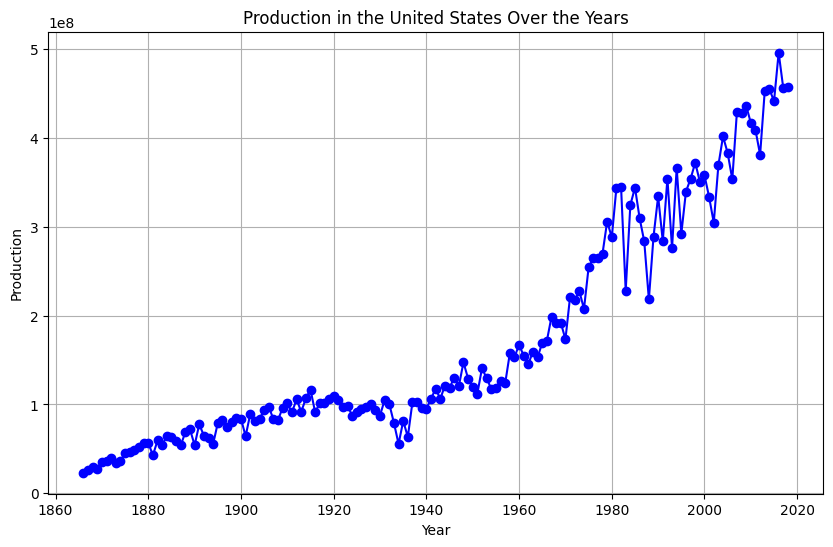

In [58]:
us_df = grouped_data[grouped_data['admin0'] == 'United States']


plt.figure(figsize=(10, 6))
plt.plot(us_df['year'], us_df['production (tonnes)'], marker='o', linestyle='-', color='b')
plt.title('Production in the United States Over the Years')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()

In [57]:
filtered_df = grouped_data.loc[grouped_data['year'] == 2017]
print(filtered_df.sort_values(by="production (tonnes)", ascending=False))

              admin0  year  production (tonnes)
2385   United States  2017         4.559482e+08
760            China  2017         3.935749e+08
1131           India  2017         1.272300e+08
117        Argentina  2017         6.197796e+07
1013          France  2017         5.109660e+07
585           Canada  2017         4.407950e+07
263        Australia  2017         3.181874e+07
1480          Mexico  2017         3.126600e+07
475           Brazil  2017         3.004749e+07
2232  United Kingdom  2017         1.483837e+07
1873    South Africa  2017         1.474231e+07
1227       Indonesia  2017         1.171297e+07
1560         Morocco  2017         9.787246e+06
1355           Italy  2017         6.543045e+06
1971           Spain  2017         4.830281e+06
2098          Sweden  2017         3.298600e+06
377          Belgium  2017         1.702721e+06
320          Austria  2017         1.437143e+06
1677     Netherlands  2017         1.054000e+06
2496         Uruguay  2017         9.110

In [40]:
# Group the data by the 'admin0' column and count the number of rows in each group
grouped_data = df.groupby(['admin0', 'year'])['production (tonnes)'].sum().reset_index()
grouped_data
# # Print the resulting dataframe
# print(grouped_data['year'] == 2018)
# print(df['year'].value_counts())

,admin0,year,production (tonnes)
0,Argentina,1900,2034438.0
1,Argentina,1901,1534405.0
2,Argentina,1902,2823853.0
3,Argentina,1903,3529100.0
4,Argentina,1904,4102600.0
...,...,...,...
2855,Uruguay,2015,1670500.0
2856,Uruguay,2016,1244000.0
2857,Uruguay,2017,911000.0
2858,Uruguay,2018,1036600.0


In [33]:
filtered_df = grouped_data.loc[grouped_data['year'] == 2017]
print(filtered_df.sort_values(by="production (tonnes)", ascending=False))


              admin0  year  production (tonnes)
2736   United States  2017         4.559482e+08
878            China  2017         3.935749e+08
1457           India  2017         1.272300e+08
1339          France  2017         5.109660e+07
703           Canada  2017         4.407950e+07
263        Australia  2017         3.181874e+07
1830          Mexico  2017         3.126600e+07
593           Brazil  2017         3.004749e+07
117        Argentina  2017         1.851804e+07
2223    South Africa  2017         1.474231e+07
1553       Indonesia  2017         1.171297e+07
1910         Morocco  2017         9.787246e+06
1705           Italy  2017         6.543045e+06
2322           Spain  2017         4.830281e+06
2449          Sweden  2017         3.298600e+06
495          Belgium  2017         1.702721e+06
379          Austria  2017         1.437143e+06
2027     Netherlands  2017         1.054000e+06
2857         Uruguay  2017         9.110000e+05
1221         Finland  2017         8.020